# **<center>SCIENTIFIC PYTHON<br><br>Final Project</center>**
**<center>By Mukhammed Zainidinov
    <br>Submitted to
    <br>Central European University Private University<br>Department of Economics and Business</center>**

## 1. Research question

<p style='text-align: justify;'>The Independent Evaluation Group (IEG) estimates the developmental impact of all World Bank programs between 1984 and 2019. Its work provides evaluative evidence to help the World Bank Group deliver better services and results to its clients.<br><br>
IEG employs a range of methodological approaches such as portfolio analyses, structured literature reviews, surveys, and case study analyses
<br>Data sources include:

* Internal (WBG and IEG) data;
* External data sets;
* Internal and external (to the WBG) documentation;
* Interviews with different groups of stakeholders.
    
After conducting several evaluation tools, IEG reports its outcome in the range of 6 level rating: 'Highly Unsatisfactory,' 'Unsatisfactory,' 'Moderately Unsatisfactory,' 'Moderately Satisfactory,' 'Satisfactory,' and 'Highly Satisfactory' (for more information, please visit the <a href="https://ieg.worldbankgroup.org/data">website of the IEG</a>).<br><br>
Based on the IEG data, I would like to investigate whether there are any sectoral or geographical trends in the performance of the World Bank. For this purpose, I will create a dummy variable 0 for unsatisfactory projects, 1 for satisfactory projects. Then I will estimate the percentage of satisfactory projects in total projects and graph them with trend line by sectors and regions.</p>

## 2. Dataset

<p style='text-align: justify;'>For the analysis, I use 'IEG World Bank Project Performance Ratings' data which can be downloaded from the <a href="https://finances.worldbank.org/Other/IEG-World-Bank-Project-Performance-Ratings/rq9d-pctf">Development Data Hub</a>.</p>
<blockquote><p style='text-align: justify;'>The dataset contains all World Bank project assessments carried out by the Independent Evaluation Group (IEG) since the unit was created back in the 70’s. Spanning over 30 years, the collection has more than 11,300 project assessments, covering more than 9,600 completed projects; it is perhaps the longest-running and most comprehensive project performance data collection of its kind.</blockquote></p>

## 3. Data cleaning

First, we install all necessary packages that we need during our analysis:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import a dataset:

In [2]:
ieg_rating = pd.read_csv('IEG_World_Bank_Project_Performance_Ratings.csv')
ieg_rating.head(4)

,Project ID,Project Name,Region,Country Code,Country Name,Approval Date,Approval FY,Sector Board,Agreement Type,Lending Project Cost,...,IEG_BankQualityOfSupervision,IEG_OverallBankPerf,(disc)IEG_BorrPrep,IEG_ImplementingAgencyPerf,IEG_GovernmentPerf,IEG_OverallBorrPerf,IEG_ICRQuality,(disc)IEG_Sustainability,IEG_MEQuality,IEG_SourceDocumentURL
0,P146981,BR Piaui Productive and Social Inclusion,LCR,BR,Brazil,12/21/2015,2016,Environment,IBRD,200000000.0,...,SATISFACTORY,SATISFACTORY,NaN,MODERATELY SATISFACTORY,SATISFACTORY,MODERATELY SATISFACTORY,SUBSTANTIAL,NaN,SUBSTANTIAL,NaN
1,P125272,NIGER - Shared Growth Credit I,AFW,NE,Niger,6/26/2012,2012,Economic Policy,IDA,50000000.0,...,MODERATELY UNSATISFACTORY,MODERATELY UNSATISFACTORY,NaN,NaN,MODERATELY UNSATISFACTORY,MODERATELY UNSATISFACTORY,HIGH,NaN,MODEST,NaN
2,P125288,GY - UG Science and Technology Support,LCR,GY,Guyana,6/23/2011,2011,NaN,IDA,11400000.0,...,MODERATELY SATISFACTORY,MODERATELY SATISFACTORY,NaN,NaN,NaN,NaN,SUBSTANTIAL,NaN,MODEST,NaN
3,P148099,Governance and Competitiveness DPO,ECA,KG,Kyrgyz Republic,7/7/2016,2017,NaN,IDA,24000000.0,...,MODERATELY UNSATISFACTORY,MODERATELY UNSATISFACTORY,NaN,NOT RATED,UNSATISFACTORY,UNSATISFACTORY,SUBSTANTIAL,NaN,MODEST,NaN


There are 36 columns. Let's look at them:

In [3]:
varlist = [] # to create a list of variable names
for col in ieg_rating.columns:
    varlist.append(col)
varlist = pd.Series(varlist) # convert a list to series to easily access the dataframe column numbers
varlist

0                       Project ID
1                     Project Name
2                           Region
3                     Country Code
4                     Country Name
5                   Approval Date 
6                      Approval FY
7                     Sector Board
8                   Agreement Type
9             Lending Project Cost
10                  Net Commitment
11              Deactivation Date 
12                         Exit FY
13         Lending Instrument Type
14             Lending Instrument 
15               Product Line Code
16                    Product Line
17                   IEG_EvalDate 
18                      IEG_EvalFY
19                    IEG_EvalType
20                ERR at Appraisal
21               ERR at Completion
22                     IEG_Outcome
23                         IEG_RDO
24              (disc)IEG_IDImpact
25          IEG_BankQualityAtEntry
26    IEG_BankQualityOfSupervision
27             IEG_OverallBankPerf
28              (dis

There are a lot of variables, and we keep only variables that we will use for the analysis:

In [4]:
drop = [5,6,8,9,10,11,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30,31,32,33,34,35] # list of columns to remove
ieg = ieg_rating.copy() # to keep the original data, we copy the dataframe
ieg.drop(ieg.columns[drop], axis = 1, inplace = True) # remove unnecessary columns
ieg.head(4)

,Project ID,Project Name,Region,Country Code,Country Name,Sector Board,Exit FY,IEG_Outcome
0,P146981,BR Piaui Productive and Social Inclusion,LCR,BR,Brazil,Environment,2018,Moderately Satisfactory
1,P125272,NIGER - Shared Growth Credit I,AFW,NE,Niger,Economic Policy,2013,Moderately Unsatisfactory
2,P125288,GY - UG Science and Technology Support,LCR,GY,Guyana,NaN,2018,Satisfactory
3,P148099,Governance and Competitiveness DPO,ECA,KG,Kyrgyz Republic,NaN,2018,Moderately Unsatisfactory


The variables we need for the analysis and their explanations are:
1. **Project ID** - Project ID
2. **Project Name** - Project name
3. **Region** - Region abbreviation
4. **Country Code** - Alpha‑2 country code
5. **Country Name** - Country name
6. **Sector Board** - Sector
7. **Exit FY** - Year when a project was accomplished
8. **IEG_Outcome** - Overall project performance rating

In [5]:
print('Number of observations:', len(ieg))

Number of observations: 12932


There might be duplicates. Let's check for duplicates. *Project ID* is a unique identifier. That's why we check for duplicates using it:

In [6]:
print(f'There are {len(ieg[ieg.duplicated(subset = ["Project ID"])])} duplicates.')

There are 2033 duplicates.


We detected duplicates, and we have to drop them:

In [7]:
ieg.drop_duplicates(subset = ['Project ID'], inplace = True)
print(f'After dropping duplicate observations, we have {len(ieg)} observations.')

After dropping duplicate observations, we have 10899 observations.


Let's look at how many projects were completed in a given year:

In [8]:
ieg['Exit FY'].value_counts(dropna = False).sort_index(ascending = True)

0        34
1964      1
1966      1
1967      1
1968      4
1969      3
1970      2
1971      2
1972     16
1973     52
1974     80
1975     67
1976     94
1977    105
1978    102
1979    258
1980    163
1981    168
1982    165
1983    236
1984    225
1985    224
1986    230
1987    220
1988    235
1989    255
1990    176
1991    211
1992    226
1993    233
1994    266
1995    242
1996    231
1997    239
1998    287
1999    286
2000    278
2001    278
2002    271
2003    287
2004    308
2005    308
2006    285
2007    257
2008    239
2009    263
2010    288
2011    320
2012    347
2013    322
2014    266
2015    283
2016    258
2017    249
2018    230
2019    191
2020     31
Name: Exit FY, dtype: int64

We see that there is a year that is 0. In our analysis year cannot be 0. So, we should drop observations for which *Exit FY* is 0:

In [9]:
ieg = ieg[ieg['Exit FY'] != 0]
print(f'After dropping "Exit FY" = 0, there left {len(ieg)} observations.')

After dropping "Exit FY" = 0, there left 10865 observations.


Now we have to generate a new column called *Rating* whose value is defined by *IEG_Outcome*:

|IEG_Outcome|Rating
|:---|:---
|Highly Unsatisfactory|1
|Unsatisfactory|2
|Moderately Unsatisfactory|3
|Moderately Satisfactory|4
|Satisfactory|5
|Highly Satisfactory|6

In [10]:
ieg.loc[ieg['IEG_Outcome'] == 'Highly Unsatisfactory', 'Rating'] = 1
ieg.loc[ieg['IEG_Outcome'] == 'Unsatisfactory', 'Rating'] = 2
ieg.loc[ieg['IEG_Outcome'] == 'Moderately Unsatisfactory', 'Rating'] = 3
ieg.loc[ieg['IEG_Outcome'] == 'Moderately Satisfactory', 'Rating'] = 4
ieg.loc[ieg['IEG_Outcome'] == 'Satisfactory', 'Rating'] = 5
ieg.loc[ieg['IEG_Outcome'] == 'Highly Satisfactory', 'Rating'] = 6

Let's count the number of projects by *Rating*:

In [11]:
ieg['Rating'].value_counts(dropna = False).sort_index(ascending = True)

1.0     149
2.0    1736
3.0     883
4.0    2373
5.0    5236
6.0     316
NaN     172
Name: Rating, dtype: int64

Some projects are not rated. Therefore there are missing values for *Rating*. Since there is no evaluation, we do not need them:

In [12]:
ieg = ieg.dropna(subset = ['Rating']) # drop missing values
print(f'After dropping missing values for Rating, we have {len(ieg)} observations.')

After dropping missing values for Rating, we have 10693 observations.


We define the success of a project by its rating. Now we create two dummy variables that indicate whether a project was successful or not. New dummy variables *Unsuccessful* and *Successful* take the following values:

|IEG_Outcome|Rating|Unsuccessful|Successful
|:---|:---|:---|:---
|Highly Unsatisfactory|1|1|0
|Unsatisfactory|2|1|0
|Moderately Unsatisfactory|3|1|0
|Moderately Satisfactory|4|0|1
|Satisfactory|5|0|1
|Highly Satisfactory|6|0|1

In [13]:
ieg['Unsuccessful'] = ieg['Rating'].apply(lambda x: 1 if x < 4 else 0)
ieg['Successful'] = ieg['Rating'].apply(lambda x: 1 if x >= 4 else 0)

## 4. Analyze trends by region

For this analysis, we only need several variables: *Region, Exit FY, Unsuccessful, Successful*

In [14]:
ieg_by_region = ieg[['Region', 'Exit FY', 'Unsuccessful', 'Successful']]

Column *Region* takes the following values:
* **AFE** - Africa East
* **AFR** - Africa
* **AFW** - Africa West
* **EAP** - East Asia and Pacific
* **ECA** - Europe and Central Asia
* **LCR** - Latin America and Caribbean
* **MNA** - Middle East and North Africa
* **SAR** - South Asia
* **OTH** - Others

We are not interested in undefined regions. That's why we remove them from our dataset:

In [15]:
ieg_by_region = ieg_by_region[ieg_by_region['Region'] != 'OTH'] # OTH is undefined region
print(f'After dropping undefined regions, there are {len(ieg_by_region)} observations.')

After dropping undefined regions, there are 10687 observations.


To easily understand the region's name, we give the full name of the region instead of its abbreviation:

In [16]:
ieg_by_region['Region'] = ieg_by_region['Region'].replace('AFE','Africa East')
ieg_by_region['Region'] = ieg_by_region['Region'].replace('AFR','Africa')
ieg_by_region['Region'] = ieg_by_region['Region'].replace('AFW','Africa West')
ieg_by_region['Region'] = ieg_by_region['Region'].replace('EAP','East Asia and Pacific')
ieg_by_region['Region'] = ieg_by_region['Region'].replace('ECA','Europe and Central Asia')
ieg_by_region['Region'] = ieg_by_region['Region'].replace('LCR','Latin America and Caribbean')
ieg_by_region['Region'] = ieg_by_region['Region'].replace('MNA','Middle East and North Africa')
ieg_by_region['Region'] = ieg_by_region['Region'].replace('SAR','South Asia')

We estimate the number of successful and unsuccessful projects in each region by year:

In [17]:
ieg_regiongroup = ieg_by_region.groupby(['Region', 'Exit FY']).sum().reset_index()

We create a new variable that estimates the total number of completed projects in each region by year:

In [18]:
ieg_regiongroup['Total'] = ieg_regiongroup['Unsuccessful'] + ieg_regiongroup['Successful']

Then we create a new column that calculates the percentage of successful projects. This variable is going to be *y* variable in our analysis.

In [19]:
ieg_regiongroup['Success Ratio'] = 100 * ieg_regiongroup['Successful'] / ieg_regiongroup['Total']

We have to remove years when only one project was accomplished in a region. If there was only one project in a region for a given year, it provides us inaccurate estimation because it takes a value of either 0% or 100%, depending on the rating.

In [20]:
ieg_regiongroup = ieg_regiongroup[ieg_regiongroup['Total'] != 1]
number = ieg_regiongroup['Total'].sum()
print(f'After dropping years with only one project in a region, there left {number} observations.')

After dropping years with only one project in a region, there left 10669 observations.


First, let's look at the total number of accomplished projects in each region for the whole period:

In [21]:
ieg_region_n = ieg_regiongroup.groupby(['Region']).sum().reset_index()
ieg_region_n = ieg_region_n[['Region', 'Total']]
ieg_region_n

,Region,Total
0,Africa,1467
1,Africa East,839
2,Africa West,853
3,East Asia and Pacific,1730
4,Europe and Central Asia,1466
5,Latin America and Caribbean,2116
6,Middle East and North Africa,946
7,South Asia,1252


Each region has many observations, meaning lots of variations, which is good for more accurate estimation. Then we plot dynamics of the share of satisfactory projects with trend line using `lmplot` function of `seaborn`:

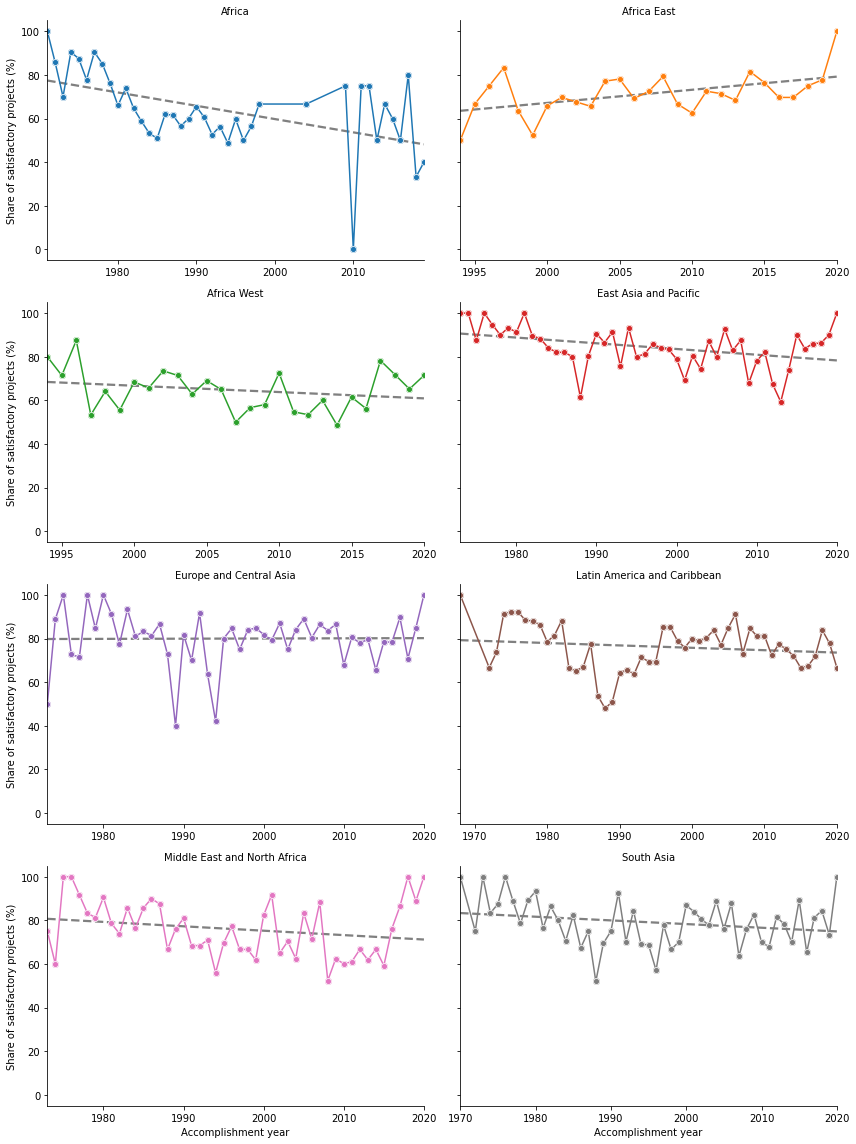

In [22]:
g = sns.lmplot(x = 'Exit FY', y = 'Success Ratio', col = 'Region', hue = 'Region', data = ieg_regiongroup, col_wrap = 2,
               height = 4, aspect = 1.5, sharex = False, ci = None, line_kws = {'ls':'--', 'color':'grey'})
g.map(sns.lineplot, 'Exit FY', 'Success Ratio')
g.set_axis_labels('Accomplishment year', 'Share of satisfactory projects (%)')
g.set_titles(col_template = '{col_name}')
plt.savefig('figure-final_project_region.jpeg');

### Concluding remarks
<p style='text-align: justify;'>Virtually, we see a declining trend in the share of successful projects in all regions except for Africa East, Europe and Central Asia. The average percentage of successful projects substantially decreased in the Africa region. On the other hand, Africa East benefited from successful projects meaning that the World Bank is doing well in this region. Despite the negative trend in the remaining regions, the slope is not large.</p>

## 5. Analyze trends by sector

For this analysis, we use the cleaned *ieg* dataset, but we remove columns that we do not need for our analysis:

In [23]:
ieg_by_sector = ieg[['Sector Board', 'Exit FY', 'Unsuccessful', 'Successful']]

Let's look at what sectors there are:

In [24]:
sector_count = ieg_by_sector['Sector Board'].value_counts(dropna = False)
sector_count

Agriculture and Rural Development                2202
Energy and Mining                                1295
Transport                                        1211
Education                                         921
Economic Policy                                   758
Water                                             556
Health, Nutrition and Population                  550
Public Sector Governance                          549
Urban Development                                 533
Financial and Private Sector Development          487
Environment                                       396
Social Protection                                 356
Financial Sector                                  315
NaN                                               174
Global Information/Communications Technology      167
Social Development                                 87
Poverty Reduction                                  74
Private Sector Development                         18
Financial Management        

Few projects were completed in some sectors, and there are projects for which sector is undefined. First, let's remove sectors with few observations (less than 20 projects) and then drop undefined sectors. We get a list of sectors with more than 20 projects:

In [25]:
sector_count[sector_count > 20].index

Index([           'Agriculture and Rural Development',
                                  'Energy and Mining',
                                          'Transport',
                                          'Education',
                                    'Economic Policy',
                                              'Water',
                   'Health, Nutrition and Population',
                           'Public Sector Governance',
                                  'Urban Development',
           'Financial and Private Sector Development',
                                        'Environment',
                                  'Social Protection',
                                   'Financial Sector',
                                                  nan,
       'Global Information/Communications Technology',
                                 'Social Development',
                                  'Poverty Reduction'],
      dtype='object')

Then we get mask for *ieg_by_sector* that is `True` for sectors that we want to keep:

In [26]:
ieg_by_sector['Sector Board'].isin(sector_count[sector_count > 20].index)

0        True
1        True
2        True
3        True
4        True
         ... 
12927    True
12928    True
12929    True
12930    True
12931    True
Name: Sector Board, Length: 10693, dtype: bool

Finally, we drop sectors with less than 20 completed projects:

In [27]:
ieg_by_sector = ieg_by_sector[ieg_by_sector['Sector Board'].isin(sector_count[sector_count > 20].index)]

Now we drop projects for which sector is undefined:

In [28]:
ieg_by_sector.dropna(subset = ['Sector Board'], inplace = True) # drop missing values for sector
print(f'After dropping sectors with a few observations and undefined sectors, we have {len(ieg_by_sector)} observations.')

After dropping sectors with a few observations and undefined sectors, we have 10457 observations.


Next, we calculate the number of successful and unsuccessful projects in each sector by year:

In [29]:
ieg_sectorgroup = ieg_by_sector.groupby(['Sector Board', 'Exit FY']).sum().reset_index()

As we did earlier, we create a new variable that estimates the total number of accomplished projects in each sector by year:

In [30]:
ieg_sectorgroup['Total'] = ieg_sectorgroup['Unsuccessful'] + ieg_sectorgroup['Successful']

Then we create a new column that calculates the percentage of successful projects. This variable is going to be y variable in our analysis:

In [31]:
ieg_sectorgroup['Success Ratio'] = 100 * ieg_sectorgroup['Successful'] / ieg_sectorgroup['Total']

Now we have to remove years when only one project was accomplished in a sector. If there was only one project in a sector for a given year, it provides us inaccurate estimation because it takes a value of either 0% or 100%, depending on the rating.

In [32]:
ieg_sectorgroup = ieg_sectorgroup[ieg_sectorgroup['Total'] != 1]
observations = ieg_sectorgroup['Total'].sum()
print(f'After dropping years with only one project in a sector, there left {observations} observations.')

After dropping years with only one project in a sector, there left 10415 observations.


First, let's look at the total number of projects in each sector for the whole period. To display the total number of projects by sector, we run the following codes:

In [33]:
ieg_sector_n = ieg_sectorgroup.groupby(['Sector Board']).sum().reset_index()
ieg_sector_n = ieg_sector_n[['Sector Board', 'Total']]
ieg_sector_n

,Sector Board,Total
0,Agriculture and Rural Development,2202
1,Economic Policy,755
2,Education,918
3,Energy and Mining,1292
4,Environment,393
5,Financial Sector,315
6,Financial and Private Sector Development,483
7,Global Information/Communications Technology,159
8,"Health, Nutrition and Population",549
9,Poverty Reduction,74


The number of observations in each sector is quite large except for *Poverty Reduction* and *Social Development*. Then we plot dynamics of the share of completed projects with "satisfactory" ratings by sector using `lmplot` function of `seaborn`:

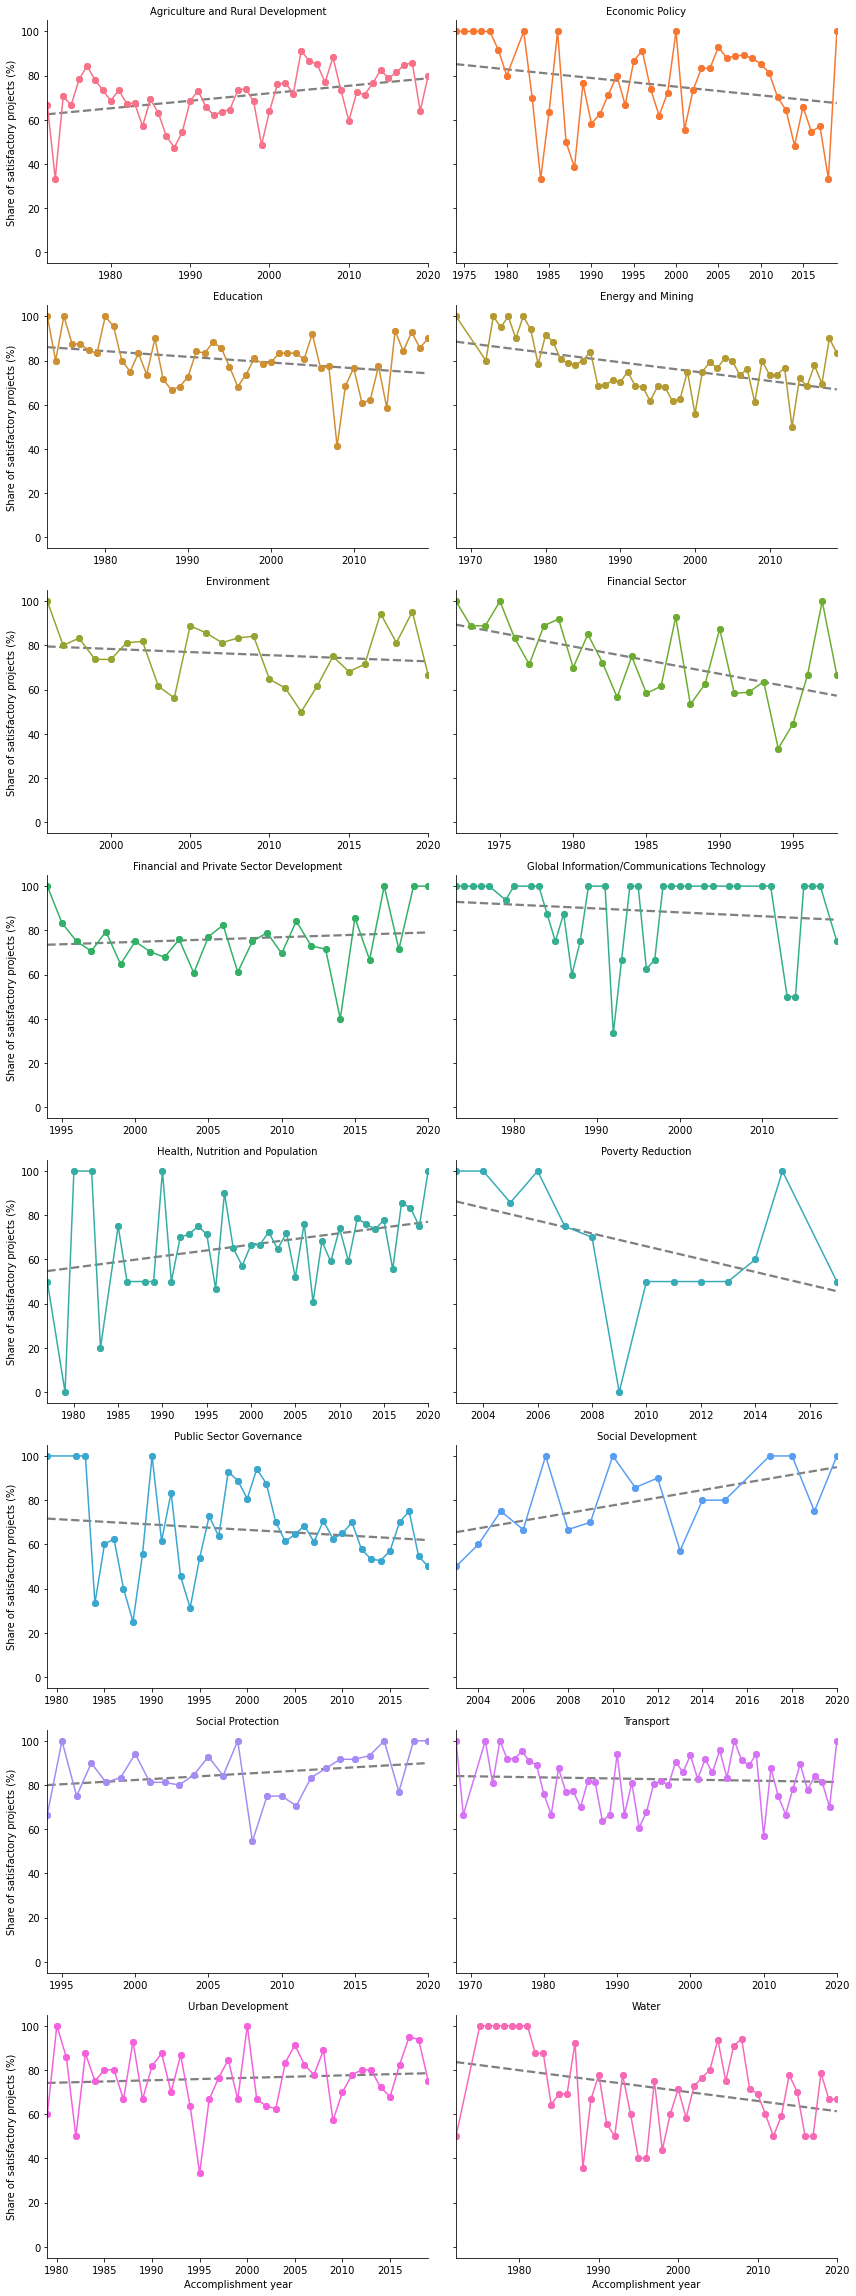

In [34]:
g = sns.lmplot(x = 'Exit FY', y = 'Success Ratio', col = 'Sector Board', hue = 'Sector Board', data = ieg_sectorgroup, col_wrap = 2,
               height = 4, aspect = 1.5, sharex = False, ci = None, line_kws = {'ls':'--', 'color':'grey'})
g.map(plt.plot, 'Exit FY', 'Success Ratio')
g.set_axis_labels('Accomplishment year', 'Share of satisfactory projects (%)')
g.set_titles(col_template = '{col_name}')
plt.savefig('figure-final_project_sector.jpeg');

### Concluding remarks
* Sectors with the positive trend (World Bank is doing well in these sectors):
    * Agriculture and Rural Development
    * Financial and Private Sector Development
    * Health, Nutrition and Population
    * Social Development
    * Social Protection
    * Urban Development
* Sectors with the negative trend (World Bank is failing to accomplish projects in these sectors successfully):
    * Economic Policy
    * Education
    * Energy and Mining
    * Environment
    * Financial Sector 
    * Global Information/Communications Technology
    * Poverty Reduction
    * Public Sector Governance
    * Transport
    * Water

## 6. Conclusion

In this project, I tried to depict trends in the performance of the World Bank Group. In general, the share of projects that reached stated goals is declining across regions and sectors. It means that the effectiveness of the projects conducted by the World Bank is also declining. Therefore the World Bank should enhance its performance in implementing developmental projects.